<a href="https://colab.research.google.com/github/leonardo-91/sistemas-inteligentes/blob/main/Proyecto_Final_Sistemas_Inteligentes_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifica Universidad Javeriana**

Sistemas Inteligentes


---



**Grupo:**

1.   Edison Leonardo Neira Espitia
2.   Sergio Rairan
3.   Sebastian Herrara




---





# **Sistema inteligente para la segmentación de clientes con el fin de potencializar y optimizar la conversión de la campaña deposito financiero**



---



# **Contexto**

Una institución bancaria portuguesa, propone a través de una campaña de marketing basada en llamadas telefónica, predecir si un usuario se suscribirá a un depósito a plazos. De cada usuario intentan saber atributos como el trabajo actual, el nivel de educación, el incumplimiento financiero, etc. Actualmente, la institución realiza las llamadas sin clasificar ni priorizar clientes, como consecuencia se tiene un tiempo elevado en la labor e incomodidad en clientes que no cumplan con el perfil.



## **Objetivo**

Aumentar el número de clientes que se suscriben y al mismo tiempo eficientar la operación de la campaña de depósito financiero (CDT) a partir de estrategias orientadas a la conversión de usuarios usando cuatro técnicas de IA utilizando datos de los años 2012 - 2014 con un nivel mínimo de precisión del 80% de conversión, buscando ampliar el recaudo financiero para la compañía (Banco), posibilitando el aumento del índice de inversión y por ende el aumento de las utilidades. Esperamos analizar estos cuatro tipos de técnicas de IA por medio de Google Colabs usando Python 3.7 como leguaje de programación, y Scikit-Learn como librería de apoyo para la implementación de los diferentes algoritmos, a su vez usaremos el set de datos públicos de una institución financiera de Portugal que se encuentra alojado en Center of Machine Learning  and Intellignet system (UCI), tenemos como objetivo desarrollar este análisis en el transcurso del curso que se estima será de 3 meses.  



---



## **Desarrollo**

In [1]:
!python --version

Python 3.7.13


**Librerías**

In [196]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
import collections, numpy
from sklearn.metrics import precision_score


**Matriz de confusión**

In [3]:
def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

**Cargue de datos**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Ruta leo : "/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv"
#Ruta Sergio : "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"
#Ruta Sebastián: "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"

df_bank = pd.read_csv("/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv", sep=";")

In [6]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df_bank.y.value_counts(ascending=False)

no     39922
yes     5289
Name: y, dtype: int64

**Variables Nominales**


*   Job
*   marital
*   Default (1 Solo Valor)
*   housing (1 Solo Valor)
*   loan (1 Solo Valor)
*   contact 
*   poutcome
*   y (1 Solo Valor)
*   month


**Variables Desccartadas**

*   duration	(Varible que tiene una alta relacion con la campaña por lo cual nos puede sobre ajustar el modelo, pues indica tiempo de duracion de la llamada y es 0 cuando no ha sido contacto). 

**Variables Ordinales**

*   education






In [8]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df_bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [10]:
df_bank.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [11]:
df_bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Creamos Data Frame para preparlo

In [12]:
df_piv=df_bank.copy()

Convertimos varibales nominales 

In [13]:
df_piv=pd.get_dummies(df_piv,columns=['job','marital','poutcome'],drop_first = True)

In [14]:
df_piv

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,1,0,0,0,1,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,unknown,5,may,198,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,cellular,17,nov,977,...,0,0,1,0,0,1,0,0,0,1
45207,71,primary,no,1729,no,no,cellular,17,nov,456,...,0,0,0,0,0,0,0,0,0,1
45208,72,secondary,no,5715,no,no,cellular,17,nov,1127,...,0,0,0,0,0,1,0,0,1,0
45209,57,secondary,no,668,no,no,telephone,17,nov,508,...,0,0,0,0,0,1,0,0,0,1


In [15]:
df_piv=pd.get_dummies(df_piv,columns=['default','housing','loan','contact','y'],drop_first = True)

In [16]:
df_piv=pd.get_dummies(df_piv,columns=['month'])

In [17]:
df_piv

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,tertiary,2143,5,261,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,secondary,29,5,151,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,secondary,2,5,76,1,-1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,unknown,1506,5,92,1,-1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,unknown,1,5,198,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,17,977,3,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,primary,1729,17,456,2,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,secondary,5715,17,1127,5,184,3,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,secondary,668,17,508,4,-1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df_piv.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'y_yes',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [20]:
df_piv[['y_yes']].value_counts()

y_yes
0        39922
1         5289
dtype: int64

In [21]:
df_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   duration           45211 non-null  int64 
 5   campaign           45211 non-null  int64 
 6   pdays              45211 non-null  int64 
 7   previous           45211 non-null  int64 
 8   job_blue-collar    45211 non-null  uint8 
 9   job_entrepreneur   45211 non-null  uint8 
 10  job_housemaid      45211 non-null  uint8 
 11  job_management     45211 non-null  uint8 
 12  job_retired        45211 non-null  uint8 
 13  job_self-employed  45211 non-null  uint8 
 14  job_services       45211 non-null  uint8 
 15  job_student        45211 non-null  uint8 
 16  job_technician     45211 non-null  uint8

Eliminamos columna duration

In [22]:
df_piv.drop(['duration'],axis=1,inplace=True)

In [23]:
df_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   balance            45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   campaign           45211 non-null  int64 
 5   pdays              45211 non-null  int64 
 6   previous           45211 non-null  int64 
 7   job_blue-collar    45211 non-null  uint8 
 8   job_entrepreneur   45211 non-null  uint8 
 9   job_housemaid      45211 non-null  uint8 
 10  job_management     45211 non-null  uint8 
 11  job_retired        45211 non-null  uint8 
 12  job_self-employed  45211 non-null  uint8 
 13  job_services       45211 non-null  uint8 
 14  job_student        45211 non-null  uint8 
 15  job_technician     45211 non-null  uint8 
 16  job_unemployed     45211 non-null  uint8

Convertimos variables Ordinales

In [24]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [25]:
# Variable education 
education_orden=OrdinalEncoder(categories=[["unknown","primary","secondary","tertiary"]])
#Train la conversion
education_orden.fit(df_piv[['education']])
#Agregar variable convertida
df_piv['education_orden']=education_orden.transform(df_piv[['education']])

In [26]:
df_piv.columns

Index(['age', 'education', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'y_yes',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'education_orden'],
      dtype='object')

In [27]:
df_piv[['education','education_orden']].head(10)

,education,education_orden
0,tertiary,3.0
1,secondary,2.0
2,secondary,2.0
3,unknown,0.0
4,unknown,0.0
5,tertiary,3.0
6,tertiary,3.0
7,tertiary,3.0
8,primary,1.0
9,secondary,2.0


In [28]:
df_bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

borramos variables ordinales puras

In [29]:
df_piv.drop(['education'],axis=1,inplace=True)

In [30]:
df_piv.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'y_yes',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'education_orden'],
      dtype='object')

In [31]:
df_bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [32]:
df_piv[['y_yes']]

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [33]:
df_piv.head(3)

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_orden
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,3.0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2.0


**Analisis de las variables**

Diagrama de histograma

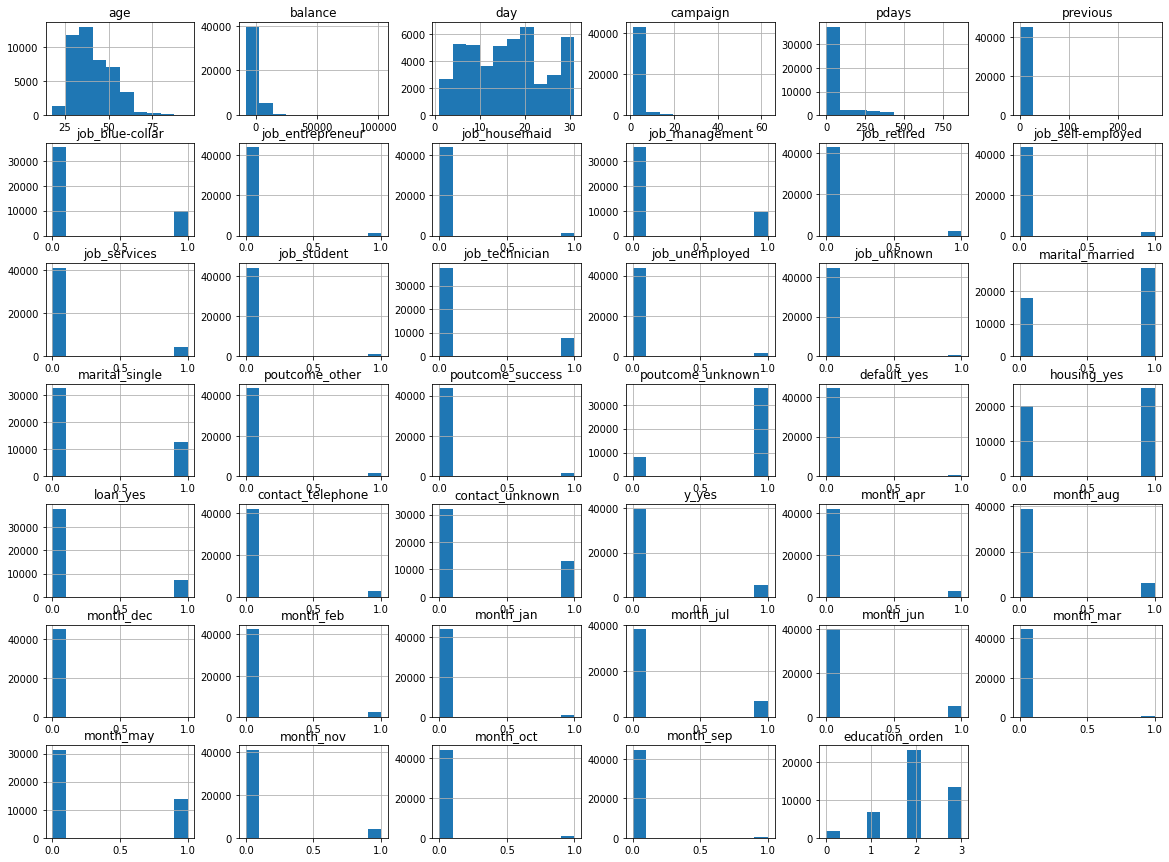

In [34]:
a=df_piv.hist(figsize=(20, 15))

**Preparacion de variables**

Eliminacion de variable etiqueta

In [35]:
df_piv_no_classes = df_piv.drop(columns='y_yes').copy()
df_piv_no_classes.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_orden
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,3.0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2.0
3,47,1506,5,1,-1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0


In [36]:
df_piv_no_classes.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'education_orden'],
      dtype='object')

Creamos la variable etiqueta como variable **y**

In [37]:
y = df_piv[['y_yes']].values[:,0]
y.shape

(45211,)

In [38]:
y[0:2]

array([0, 0], dtype=uint8)

In [39]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

creamos nuestras variable **x** que sera el vector de las variables transformadas

In [40]:
x=df_piv_no_classes.values
x.shape

(45211, 40)

In [41]:
x[0]

array([ 5.800e+01,  2.143e+03,  5.000e+00,  1.000e+00, -1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  3.000e+00])

In [42]:
df_piv_no_classes.head(1)

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_orden
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,3.0


In [43]:
x[0]

array([ 5.800e+01,  2.143e+03,  5.000e+00,  1.000e+00, -1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  3.000e+00])

Imprimimos media y desvicion estandar

In [44]:
np.mean(x)

36.73413992170047

In [45]:
np.std(x)

526.4500143161638

Analizamos correlacion de variables

In [46]:
df_piv.corr()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_orden
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288,-0.044002,0.021792,0.086650,-0.023571,...,-0.001198,-0.007466,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.173615
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674,-0.048757,0.009642,0.001661,0.067797,...,-0.003537,-0.024421,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.050572
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710,-0.022898,-0.002312,0.003955,0.019021,...,-0.283326,0.250523,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,0.021661
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855,0.008986,0.002128,0.003097,0.016686,...,-0.030747,-0.063064,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,0.000194
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820,0.020063,-0.014203,-0.031350,-0.007871,...,0.071023,0.049509,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.007092
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000,-0.017095,-0.008181,-0.015204,0.019579,...,0.065243,0.047004,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.025295
job_blue-collar,-0.044002,-0.048757,-0.022898,0.008986,0.020063,-0.017095,1.000000,-0.096585,-0.087951,-0.269376,...,-0.038316,-0.036313,-0.013203,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,-0.352876
job_entrepreneur,0.021792,0.009642,-0.002312,0.002128,-0.014203,-0.008181,-0.096585,1.000000,-0.030969,-0.094850,...,-0.000067,-0.005825,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,0.041570
job_housemaid,0.086650,0.001661,0.003955,0.003097,-0.031350,-0.015204,-0.087951,-0.030969,1.000000,-0.086372,...,-0.012486,-0.005061,0.034992,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265,-0.107661
job_management,-0.023571,0.067797,0.019021,0.016686,-0.007871,0.019579,-0.269376,-0.094850,-0.086372,1.000000,...,0.000194,-0.001099,-0.013827,-0.032403,0.023532,-0.084114,0.051012,0.009704,0.023154,0.450484


Text(0.5, 1.0, 'Correlacion de variables Numericas')

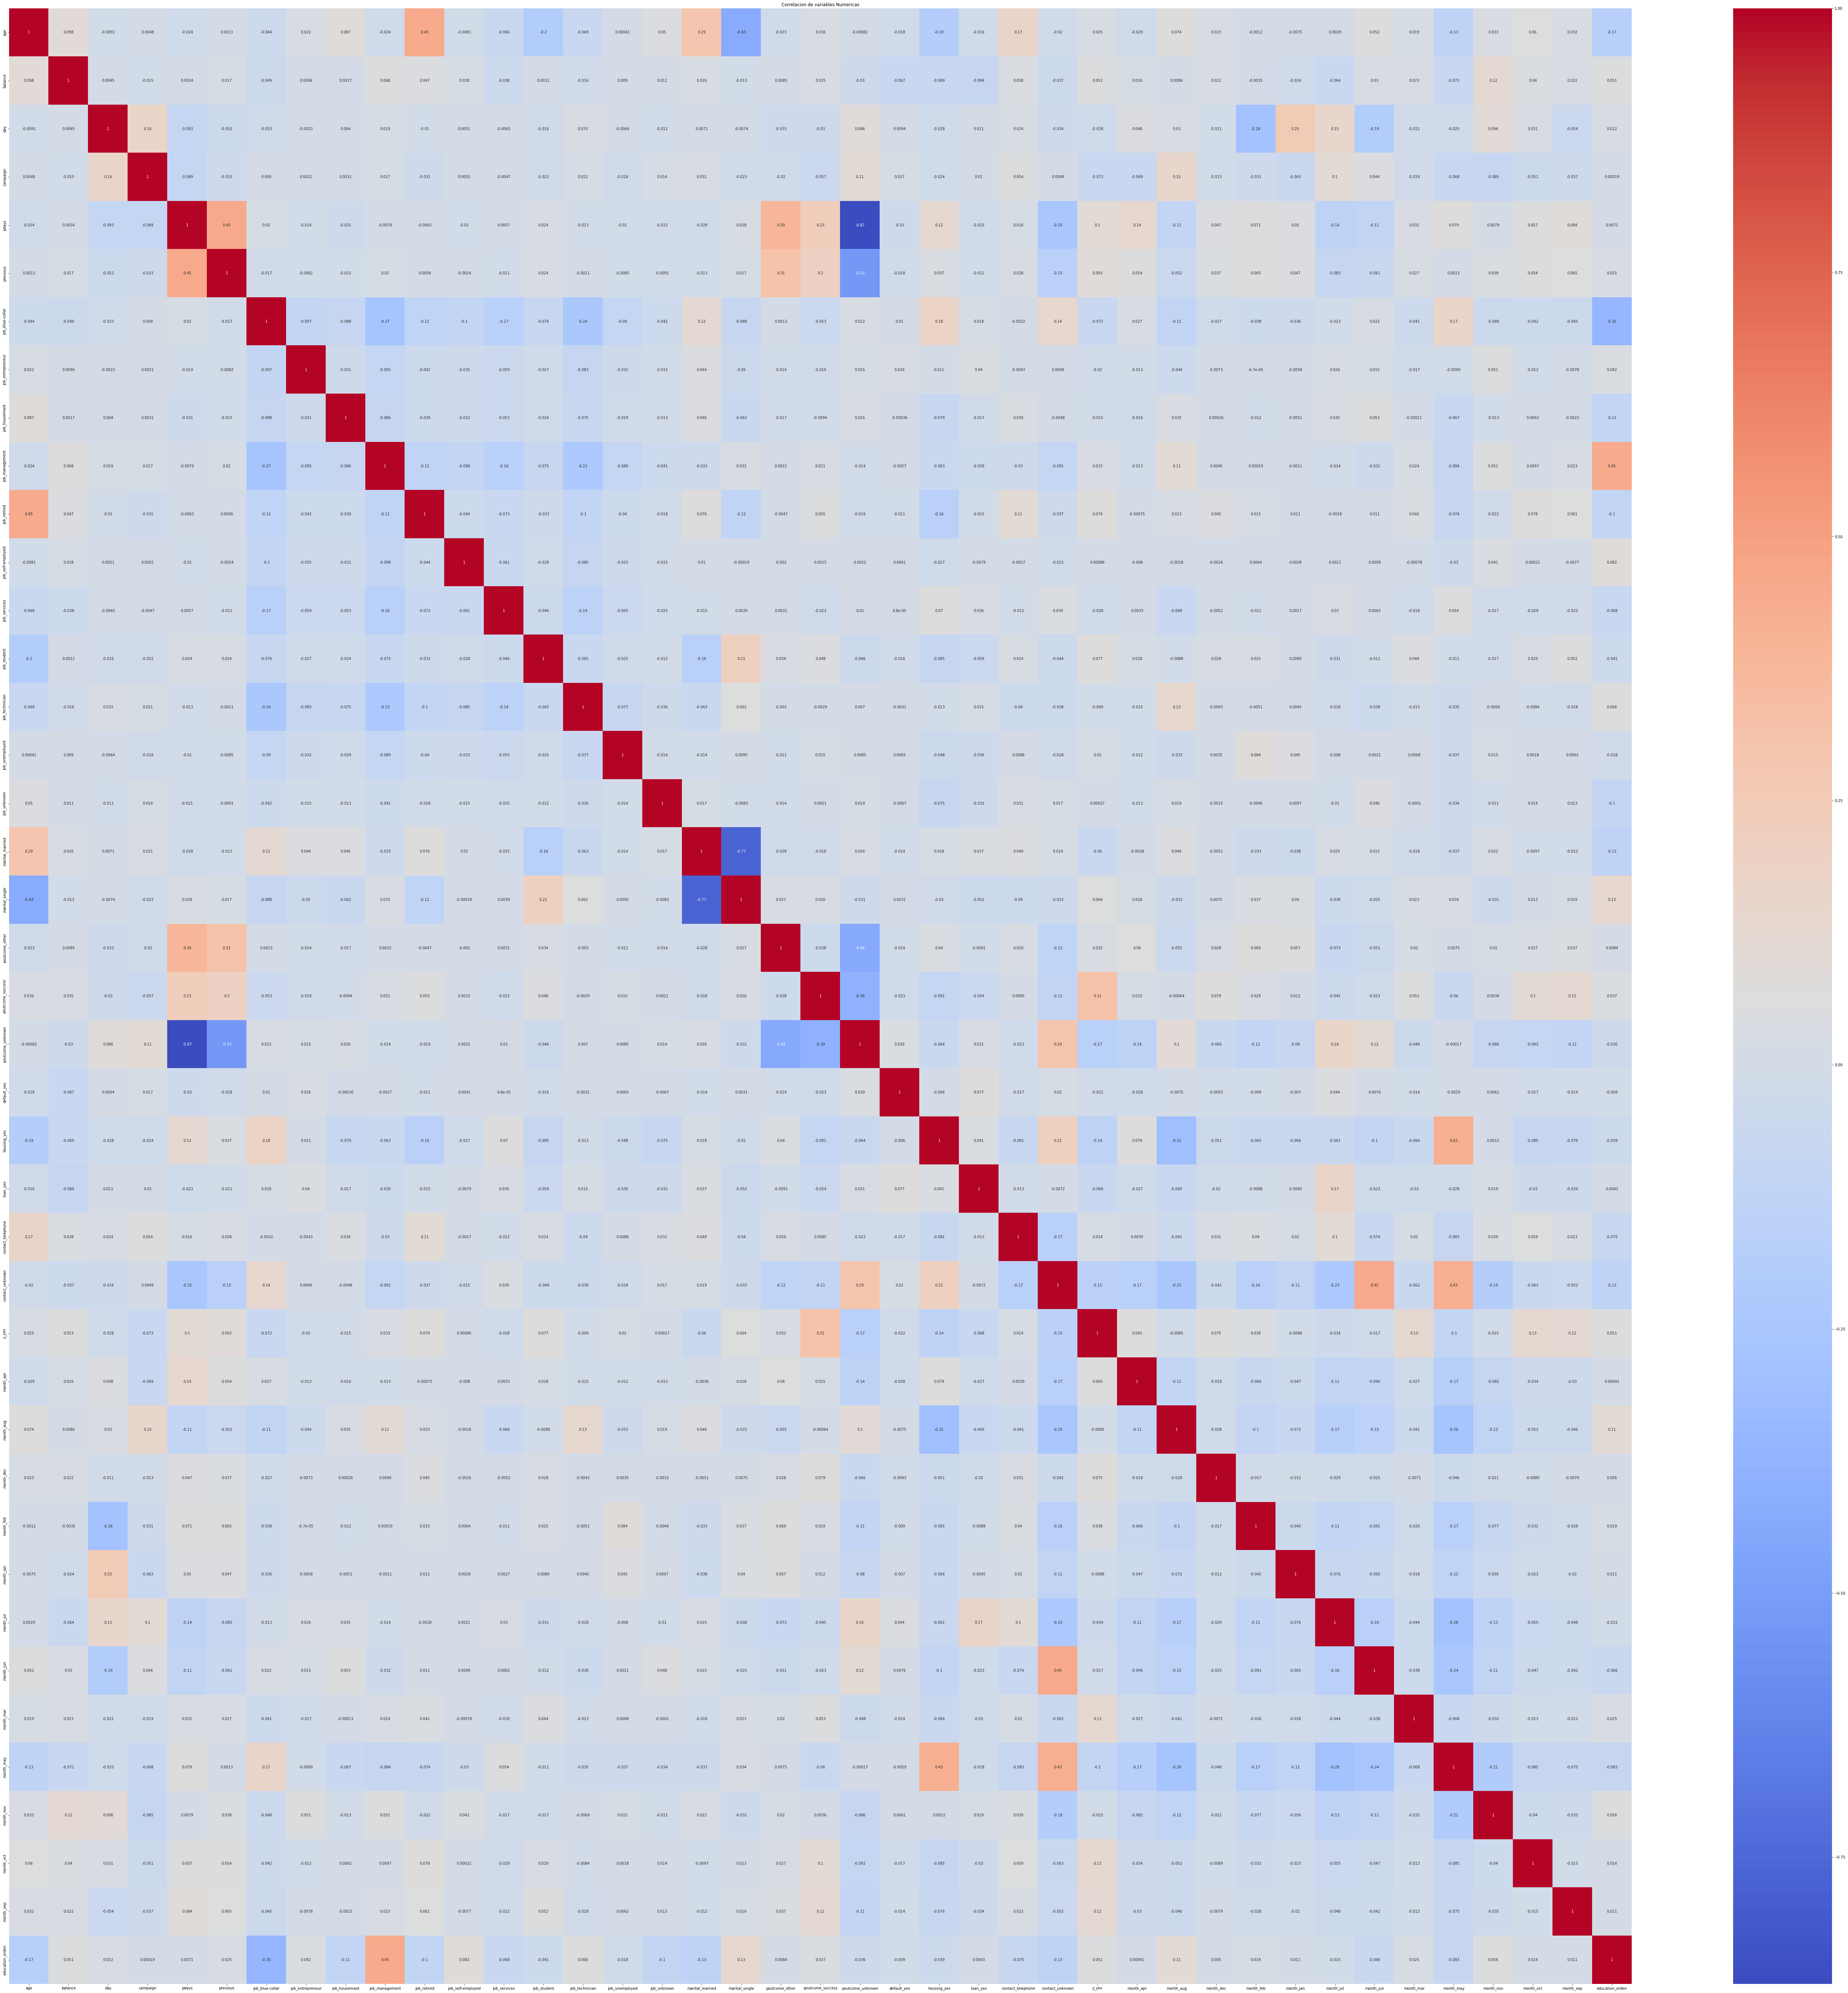

In [47]:
plt.subplots(figsize=(100,100)) 
sns.heatmap(df_piv.corr(),cmap='coolwarm',annot=True)
plt.title('Correlacion de variables Numericas')

Luego de analizar que no presentanmos varibales altamente correlacionadas procedemos a experimentar con el modelo **Random Forest**

**Estandarizacion de datos**

In [48]:
sc_x = StandardScaler()
sc_x.fit(x)
X_scaler = sc_x.transform(x)
print(np.mean(X_scaler)) 
print(np.std(X_scaler))

-1.7602084980454143e-18
1.0


**Entrenamiento del algoritmo Random Forents**

**Experimento 1**

Vamos a realizar una ejecución sin modificar balanceo de datos ni hiperparametros para comprobar las metricas del modelo

Particionamo y estratificamos datos

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=1, stratify=y)

Vemos datos estratificados 

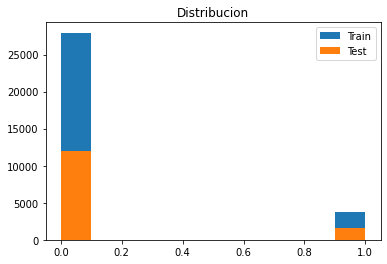

In [50]:
pl.hist(y_train, label="Train")
pl.hist(y_test, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

In [51]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=.8)
random_forest.fit(X_train, y_train);

**Verificamos resultados del modelo**

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   11722    255
Verdadero  yes  1195     392


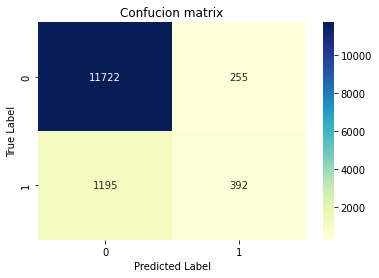

In [52]:
class_names = ['no','yes']
prediction_testRF = random_forest.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()

In [53]:
print('SCORE entrenamiento: {}'.format(random_forest.score(X_train, y_train)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X_train, y_train)))
print('SCORE prueba: {}'.format(random_forest.score(X_test, y_test)))
print('Error en prueba: {}'.format(1-random_forest.score(X_test, y_test)))
sensibilidad=recall_score(y_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.8930993807136538
Error en prueba: 0.1069006192863462
Sensibilidad: 0.24700693131695023


En esta primera ejecucion detectamos que a pesar de tener  una presicion muy alta, presenta una pesima sensibilidad que es nuestro objectivo, por lo cual decidimos como primera medida atacar el desbalanceo de nuestro set de datos. 

**Tratando el desbalanceo**

Estrategia: **Subsampling en la clase mayoritaria**


In [124]:
us = NearMiss(n_neighbors=3, version=3) 

X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print ("Distribucion Original {}".format(Counter(y_train)))
print ("Distribucion despuest del subsampling {}".format(Counter(y_train_res)))

Distribucion Original Counter({0: 27945, 1: 3702})
Distribucion despuest del subsampling Counter({0: 3702, 1: 3702})


**Verificamos el balanceo**

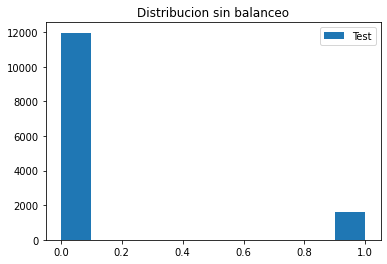

In [55]:
pl.hist(y_test, label="Test")
pl.legend()
pl.title("Distribucion sin balanceo")
pl.show()

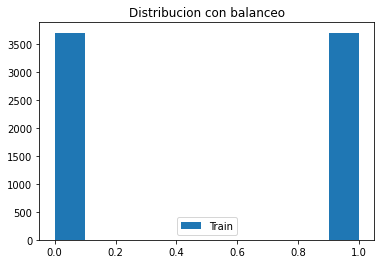

In [56]:

pl.hist(y_train_res, label="Train")
pl.legend()
pl.title("Distribucion con balanceo")
pl.show()

Corremos nuevamente random forest

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   6292     5685
Verdadero  yes  591      996


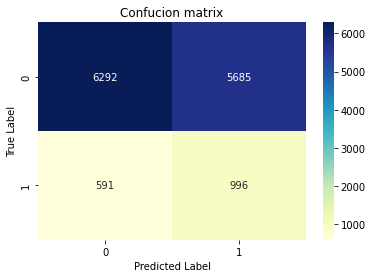

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.5373046299026836
Error en prueba: 0.4626953700973164
Sensibilidad: 0.6275992438563327


In [57]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=.8)
random_forest.fit(X_train_res, y_train_res);
prediction_testRF = random_forest.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(random_forest.score(X_train_res, y_train_res)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X_train_res, y_train_res)))
print('SCORE prueba: {}'.format(random_forest.score(X_test, y_test)))
print('Error en prueba: {}'.format(1-random_forest.score(X_test, y_test)))
sensibilidad=recall_score(y_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

En este escenario vimos una mejora significativa vrs sin  tratar el desbalanceo, sin embargo el modeloaun presenta gran oportunidad demejora

Estrategia: **Oversampling de la clase minoritaria**

In [58]:
over_sampling =  RandomOverSampler(random_state=123)
X_train_over, y_train_over = over_sampling.fit_resample(X_train, y_train)
print ("Distribucion Original {}".format(Counter(y_train)))
print ("Distribution despues del oversampling {}".format(Counter(y_train_over)))

Distribucion Original Counter({0: 27945, 1: 3702})
Distribution despues del oversampling Counter({0: 27945, 1: 27945})


**Verificamos el balanceo**

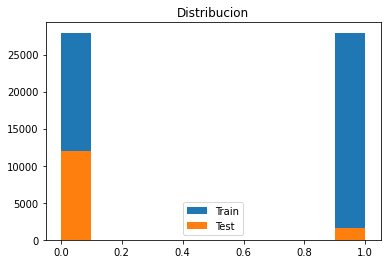

In [59]:
pl.hist(y_train_over, label="Train")
pl.hist(y_test, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

Corremos nuevamente random forest

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   11511    466
Verdadero  yes  1093     494


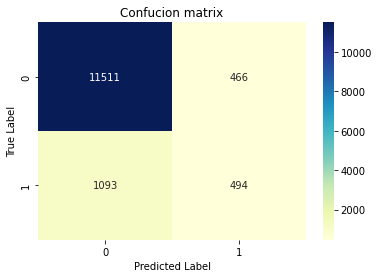

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.8850634031259216
Error en prueba: 0.11493659687407842
Sensibilidad: 0.3112791430371771


In [60]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=.8)
random_forest.fit(X_train_over, y_train_over);
prediction_testRF = random_forest.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(random_forest.score(X_train_over, y_train_over)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X_train_over, y_train_over)))
print('SCORE prueba: {}'.format(random_forest.score(X_test, y_test)))
print('Error en prueba: {}'.format(1-random_forest.score(X_test, y_test)))
sensibilidad=recall_score(y_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

En este escenario vimos que empeoro significativamente vrs subsampling pero mejoro vrs  sin tratar el desbalanceo.

Estrategia: **Combinamos oversamplig y subsampling con Smote-Tomek**

In [61]:
smote_tomek = SMOTETomek(random_state=123)
X_train_smt, y_train_smt = smote_tomek.fit_resample(X_train, y_train)
 
print ("Distribucion Original {}".format(Counter(y_train)))
print ("Distribution despues smote-Tomek {}".format(Counter(y_train_smt)))

Distribucion Original Counter({0: 27945, 1: 3702})
Distribution despues smote-Tomek Counter({0: 27613, 1: 27613})


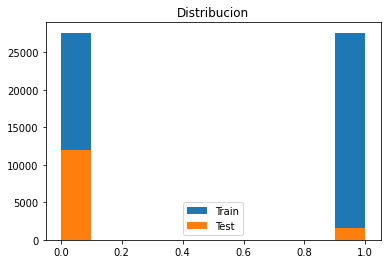

In [62]:
pl.hist(y_train_smt, label="Train")
pl.hist(y_test, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

Corremos nuevamente random forest

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   11493    484
Verdadero  yes  1127     460


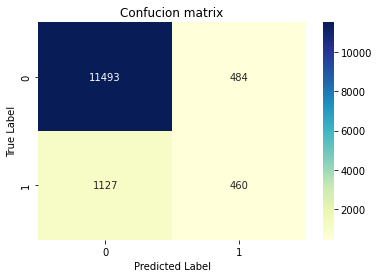

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.8812297257446181
Error en prueba: 0.11877027425538189
Sensibilidad: 0.2898550724637681


In [63]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=.8)
random_forest.fit(X_train_smt, y_train_smt);
prediction_testRF = random_forest.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(random_forest.score(X_train_smt, y_train_smt)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X_train_smt, y_train_smt)))
print('SCORE prueba: {}'.format(random_forest.score(X_test, y_test)))
print('Error en prueba: {}'.format(1-random_forest.score(X_test, y_test)))
sensibilidad=recall_score(y_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

En este escenario vimos que empeoro significativamente vrs subsampling y es muy similar a ejecutarlo sin tratar el desbalanceo.

**Mejor Modelo**

De acuerdo al analisis ejecutado encontramos que la mejor alternatiza para tratar el desbalanceo en este caso es **subsampling** por lo cual la seleccionamos para continuar con nuestro protocolo experimental

**Analisis de variables separadas**

In [64]:
df_piv.mean(axis=0)

age                    40.936210
balance              1362.272058
day                    15.806419
campaign                2.763841
pdays                  40.197828
previous                0.580323
job_blue-collar         0.215257
job_entrepreneur        0.032890
job_housemaid           0.027427
job_management          0.209197
job_retired             0.050076
job_self-employed       0.034925
job_services            0.091880
job_student             0.020747
job_technician          0.168034
job_unemployed          0.028820
job_unknown             0.006370
marital_married         0.601933
marital_single          0.282896
poutcome_other          0.040698
poutcome_success        0.033421
poutcome_unknown        0.817478
default_yes             0.018027
housing_yes             0.555838
loan_yes                0.160226
contact_telephone       0.064276
contact_unknown         0.287983
y_yes                   0.116985
month_apr               0.064851
month_aug               0.138174
month_dec 

In [65]:
df_temp=df_piv_no_classes.copy()

In [66]:
df_temp.mean(axis=0)

age                    40.936210
balance              1362.272058
day                    15.806419
campaign                2.763841
pdays                  40.197828
previous                0.580323
job_blue-collar         0.215257
job_entrepreneur        0.032890
job_housemaid           0.027427
job_management          0.209197
job_retired             0.050076
job_self-employed       0.034925
job_services            0.091880
job_student             0.020747
job_technician          0.168034
job_unemployed          0.028820
job_unknown             0.006370
marital_married         0.601933
marital_single          0.282896
poutcome_other          0.040698
poutcome_success        0.033421
poutcome_unknown        0.817478
default_yes             0.018027
housing_yes             0.555838
loan_yes                0.160226
contact_telephone       0.064276
contact_unknown         0.287983
month_apr               0.064851
month_aug               0.138174
month_dec               0.004733
month_feb 

**Estandarizando solo variables  que presentan inconsistencias**

In [67]:
column = 'age'
df_temp[column] = (df_temp[column] - df_temp[column].min()) / (df_temp[column].max() - df_temp[column].min())     


In [68]:
column = 'day'
df_temp[column] = (df_temp[column] - df_temp[column].min()) / (df_temp[column].max() - df_temp[column].min()) 

In [69]:
column = 'pdays'
df_temp[column] = (df_temp[column] - df_temp[column].min()) / (df_temp[column].max() - df_temp[column].min())

In [70]:
column = 'campaign'
df_temp[column] = (df_temp[column] - df_temp[column].min()) / (df_temp[column].max() - df_temp[column].min())

In [71]:
column = 'education_orden'
df_temp[column] = (df_temp[column] - df_temp[column].min()) / (df_temp[column].max() - df_temp[column].min())

In [73]:
column = 'balance'
df_temp[column] = (df_temp[column] - df_temp[column].min()) / (df_temp[column].max() - df_temp[column].min())

In [74]:
df_temp.mean(axis=0)

age                  0.297873
balance              0.085171
day                  0.493547
campaign             0.028449
pdays                0.047245
previous             0.580323
job_blue-collar      0.215257
job_entrepreneur     0.032890
job_housemaid        0.027427
job_management       0.209197
job_retired          0.050076
job_self-employed    0.034925
job_services         0.091880
job_student          0.020747
job_technician       0.168034
job_unemployed       0.028820
job_unknown          0.006370
marital_married      0.601933
marital_single       0.282896
poutcome_other       0.040698
poutcome_success     0.033421
poutcome_unknown     0.817478
default_yes          0.018027
housing_yes          0.555838
loan_yes             0.160226
contact_telephone    0.064276
contact_unknown      0.287983
month_apr            0.064851
month_aug            0.138174
month_dec            0.004733
month_feb            0.058592
month_jan            0.031032
month_jul            0.152507
month_jun 

In [75]:
x2=df_temp.values
x2.shape

(45211, 40)

In [76]:
y2 = df_piv[['y_yes']].values[:,0]
y2.shape

(45211,)

Usamos el mejor modelo para tratar el desbalanceo **subsampling**

In [77]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=123, stratify=y2)

In [78]:
us = NearMiss(n_neighbors=3, version=3)
X2_res, y2_res = us.fit_resample(X2_train, y2_train)
print ("Distribucion Original {}".format(Counter(y2_train)))
print ("Distribution despues del subsampling {}".format(Counter(y2_res)))

Distribucion Original Counter({0: 27945, 1: 3702})
Distribution despues del subsampling Counter({0: 3702, 1: 3702})


In [89]:
collections.Counter(y2_train)[0]

27945

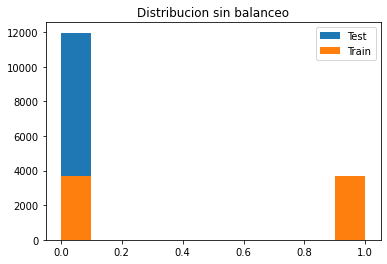

In [93]:
pl.hist(y2_test, label="Test",)
pl.hist(y2_res, label="Train")
pl.legend()
pl.title("Distribucion balanceada")
pl.show()
plt.show()

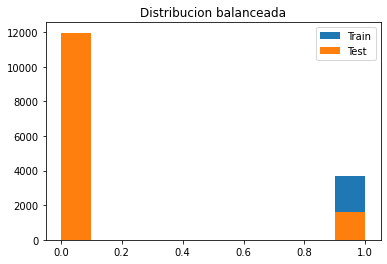

In [95]:
pl.hist(y2_res, label="Train")
pl.hist(y2_test, label="Test",)
pl.legend()
pl.title("Distribucion balanceada")
pl.show()
plt.show()

Corriendo el random forest

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   5170     6807
Verdadero  yes  507      1080


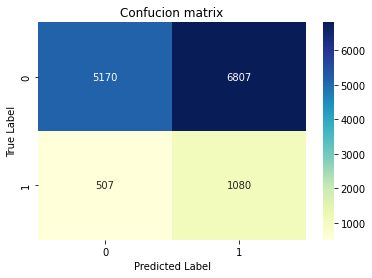

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.4607785314066647
Error en prueba: 0.5392214685933353
Sensibilidad: 0.6805293005671077


In [98]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=.8)
random_forest.fit(X2_res, y2_res);
prediction_testRF = random_forest.predict(X2_test)
cnf_matrix = confusion_matrix(y2_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(random_forest.score(X2_res, y2_res)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X2_res, y2_res)))
print('SCORE prueba: {}'.format(random_forest.score(X2_test, y2_test)))
print('Error en prueba: {}'.format(1-random_forest.score(X2_test, y2_test)))
sensibilidad=recall_score(y2_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

Metodo RandomizedSearchCV

En nuestro protocolo experimental comenzaremos por construir una random search para iterrar los hiper-parametros

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from scipy.stats import uniform 
from scipy.stats import randint

In [113]:
param_distributions = {
    'criterion':['gini', 'entropy'],
    'n_estimators': randint(4, 800),
    'max_features': uniform()
}

In [137]:
from operator import truediv
grid = RandomizedSearchCV(
        estimator  = RandomForestClassifier(random_state=123),
        param_distributions = param_distributions,
        n_iter     = 30,
        scoring    = 'accuracy',
        n_jobs     =  -1,
        cv         = 5, 
        random_state = 123,
        return_train_score = True
       )

#grid.fit(X = X_train_res,  y = y_train_res)
grid.fit(X = X2_res,  y = y2_res)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_criterion,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
13,entropy,0.987995,110,0.592372,0.059792,1.0,0.0
26,entropy,0.869369,665,0.591967,0.059541,1.0,0.0
9,gini,0.427863,180,0.590751,0.058963,1.0,0.0
24,entropy,0.545068,749,0.590480,0.061972,1.0,0.0
27,entropy,0.456748,358,0.590480,0.062148,1.0,0.0
28,entropy,0.837053,759,0.590211,0.058364,1.0,0.0
15,gini,0.493685,721,0.589805,0.060873,1.0,0.0
14,entropy,0.433701,422,0.589400,0.063137,1.0,0.0
18,gini,0.464268,158,0.589265,0.062744,1.0,0.0
10,entropy,0.724455,384,0.589265,0.061831,1.0,0.0


In [138]:
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.117876,1.647397,0.197483,0.004236,gini,0.712955,326,"{'criterion': 'gini', 'max_features': 0.712955...",0.519244,0.638082,...,0.588050,0.063118,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
1,0.665599,0.006556,0.014251,0.000996,gini,0.690885,21,"{'criterion': 'gini', 'max_features': 0.690884...",0.519244,0.637407,...,0.583594,0.055665,24,0.997299,0.999156,0.997805,0.997467,0.997974,0.99794,0.000653
2,18.997139,0.185640,0.346778,0.013681,entropy,0.491119,573,"{'criterion': 'entropy', 'max_features': 0.491...",0.530722,0.644159,...,0.588454,0.062420,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
3,2.557836,0.023870,0.072654,0.001668,gini,0.410924,117,"{'criterion': 'gini', 'max_features': 0.410924...",0.529372,0.642809,...,0.585753,0.060815,20,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
4,6.652208,0.073327,0.356979,0.007456,gini,0.139951,548,"{'criterion': 'gini', 'max_features': 0.139950...",0.540176,0.632005,...,0.569408,0.064532,29,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
5,12.622986,0.145906,0.250077,0.009738,gini,0.627317,413,"{'criterion': 'gini', 'max_features': 0.627317...",0.521269,0.639433,...,0.587510,0.061210,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
6,8.641032,0.100470,0.276231,0.010133,entropy,0.244759,424,"{'criterion': 'entropy', 'max_features': 0.244...",0.538150,0.638758,...,0.581430,0.063521,28,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
7,13.040580,0.075444,0.272063,0.005928,gini,0.593902,455,"{'criterion': 'gini', 'max_features': 0.593902...",0.519244,0.642809,...,0.585349,0.060796,21,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
8,3.296582,0.011889,0.214316,0.004880,gini,0.083726,326,"{'criterion': 'gini', 'max_features': 0.083726...",0.563133,0.634031,...,0.569407,0.067348,30,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
9,4.135713,0.055818,0.108846,0.003426,gini,0.427863,180,"{'criterion': 'gini', 'max_features': 0.427863...",0.531398,0.644835,...,0.590751,0.058963,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000


RandomForestClassifier(criterion='entropy', max_features=0.9879952865166672,
                       n_estimators=110, random_state=123)

In [140]:
grid.best_params_

{'criterion': 'entropy',
 'max_features': 0.9879952865166672,
 'n_estimators': 110}

In [141]:
grid.best_score_

0.592371936419877

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   5303     6674
Verdadero  yes  542      1045


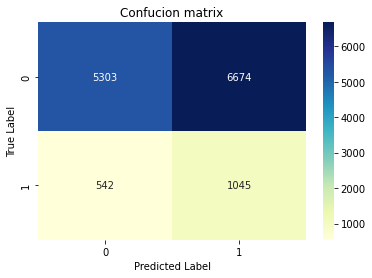

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.4680035387791212
Error en prueba: 0.5319964612208787
Sensibilidad: 0.6584751102709515


In [142]:
prediction_testRF = modelo.predict(X2_test)
cnf_matrix = confusion_matrix(y2_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(modelo.score(X2_res, y2_res)))
print('Error en entrenamiento: {}'.format(1-modelo.score(X2_res, y2_res)))
print('SCORE prueba: {}'.format(modelo.score(X2_test, y2_test)))
print('Error en prueba: {}'.format(1-modelo.score(X2_test, y2_test)))
sensibilidad=recall_score(y2_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

**Validamos imporyancia de variables con RandomFOREST**

In [145]:
modelo.feature_importances_

array([0.13688278, 0.17945262, 0.12236052, 0.05306821, 0.09660582,
       0.02740832, 0.01249833, 0.0062806 , 0.00439738, 0.01375784,
       0.00540436, 0.00556356, 0.00820241, 0.00467158, 0.01119783,
       0.00652524, 0.00123028, 0.02134796, 0.01413103, 0.0056179 ,
       0.02884709, 0.00623293, 0.00494543, 0.02193222, 0.01482461,
       0.01522843, 0.01198463, 0.01108076, 0.0129255 , 0.00364548,
       0.01040558, 0.00946024, 0.01057506, 0.01065365, 0.00777367,
       0.01593674, 0.01262349, 0.011821  , 0.00802276, 0.03447613])

In [147]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de características:")

for f in range(X2_res.shape[1]):
    print("Característica %s (%f)" % (df_temp.columns[int(indices[f])], importances[indices[f]]))

Importancia de características:
Característica balance (0.179453)
Característica age (0.136883)
Característica day (0.122361)
Característica pdays (0.096606)
Característica campaign (0.053068)
Característica education_orden (0.034476)
Característica poutcome_success (0.028847)
Característica previous (0.027408)
Característica housing_yes (0.021932)
Característica marital_married (0.021348)
Característica month_may (0.015937)
Característica contact_telephone (0.015228)
Característica loan_yes (0.014825)
Característica marital_single (0.014131)
Característica job_management (0.013758)
Característica month_aug (0.012926)
Característica month_nov (0.012623)
Característica job_blue-collar (0.012498)
Característica contact_unknown (0.011985)
Característica month_oct (0.011821)
Característica job_technician (0.011198)
Característica month_apr (0.011081)
Característica month_jun (0.010654)
Característica month_jul (0.010575)
Característica month_feb (0.010406)
Característica month_jan (0.00946

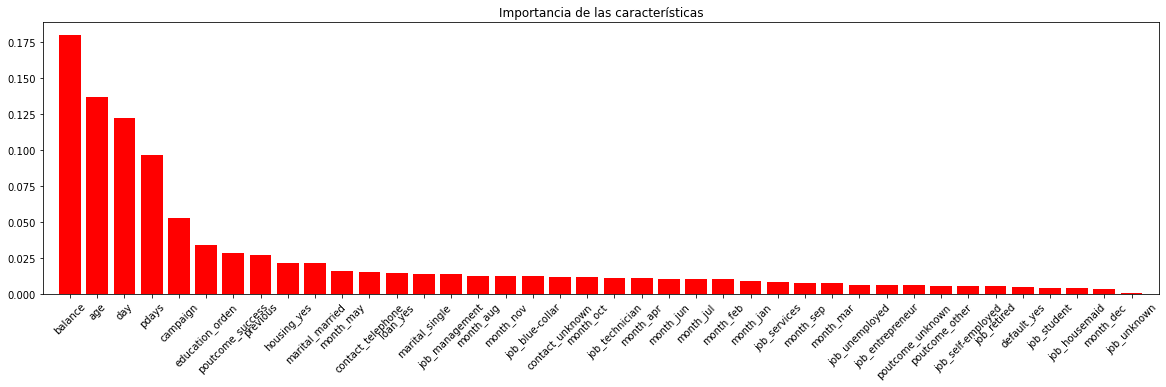

In [148]:
plt.figure(figsize=(20,5))
plt.title("Importancia de las características")
plt.bar(range(X2_res.shape[1]), importances[indices],
       color="r", align="center")
xticks_labels = [df_temp.columns[i] for i in indices]
plt.xticks(range(X2_res.shape[1]), xticks_labels, rotation=45)
plt.xlim([-1, X2_res.shape[1]])
plt.show()

**Analisis de PCA**

Realizamos analisis PCA para identificar el numero de varibales que debemos tomar

In [149]:
from sklearn.decomposition import PCA

In [150]:
sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X_scaler)
varianza_expl = sklearn_pca.explained_variance_ratio_
varianza_expl

array([7.58514372e-02, 6.16167841e-02, 5.84495879e-02, 4.24185185e-02,
       3.98302076e-02, 3.44692404e-02, 3.34865424e-02, 3.12653626e-02,
       3.05624937e-02, 3.03214339e-02, 2.82207819e-02, 2.78469817e-02,
       2.73138498e-02, 2.69738575e-02, 2.60465446e-02, 2.57630175e-02,
       2.56272716e-02, 2.54744208e-02, 2.52892895e-02, 2.51700478e-02,
       2.49714270e-02, 2.44518109e-02, 2.41718490e-02, 2.28940086e-02,
       2.21534621e-02, 2.15134870e-02, 2.10314359e-02, 2.02608374e-02,
       1.95688215e-02, 1.55508597e-02, 1.53439250e-02, 1.33380515e-02,
       1.27118693e-02, 1.19714294e-02, 1.08363978e-02, 6.35159774e-03,
       5.14205325e-03, 3.29319285e-03, 2.44581317e-03, 1.49590584e-32])

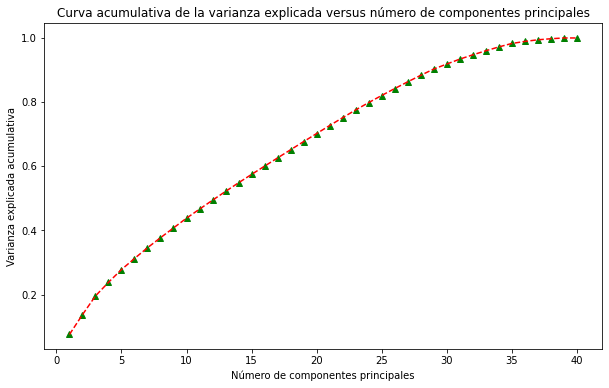

0.43827160829761697 0.6768276232098734 0.8206402286676607


In [157]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Curva acumulativa de la varianza explicada versus número de componentes principales')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()
print(np.sum(varianza_expl[0:10]), np.sum(varianza_expl[0:19]), np.sum(varianza_expl[0:25]))

Identificamos que con 25 variebles tendriamos mas del 80 % de representacion de datos. 

**Reduccion de variables**

De acuerdo al analisis PCA realizado encontramos que existe una mejoria tratanto unicamente 18 variables, lo que realizaremos a continuacion:

Eliminamos las variables que no tienen peso segun su varianza de acuerdo al analisis realizado en el algoritmo PCA y RandomForest

In [164]:
df_temp.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'education_orden'],
      dtype='object')

In [165]:
df_temp.drop(['poutcome_unknown','contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown'],axis=1,inplace=True)

In [166]:
df_temp.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'poutcome_other',
       'poutcome_success', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'education_orden'],
      dtype='object')

In [167]:
df_temp.shape

(45211, 15)

In [169]:
df_temp.mean(axis=0)

age                  0.297873
balance              0.085171
day                  0.493547
campaign             0.028449
pdays                0.047245
previous             0.580323
marital_married      0.601933
marital_single       0.282896
poutcome_other       0.040698
poutcome_success     0.033421
default_yes          0.018027
housing_yes          0.555838
loan_yes             0.160226
contact_telephone    0.064276
education_orden      0.686839
dtype: float64

In [168]:
y3 = df_piv[['y_yes']].values[:,0]
y3.shape
x3=df_temp.values
x3.shape

(45211, 15)

Usamos la mejor aproximacion de balanceo de datos **subsampling**

In [170]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=123, stratify=y3)

In [171]:
us = NearMiss(n_neighbors=3, version=3)
X3_res, y3_res = us.fit_resample(x3_train, y3_train)
print ("Distribucion Original {}".format(Counter(y3_train)))
print ("Distribution despues del subsampling {}".format(Counter(y3_res)))

Distribucion Original Counter({0: 27945, 1: 3702})
Distribution despues del subsampling Counter({0: 3702, 1: 3702})


Como anteriormente evidenciamos es mejor estandarizar los datos

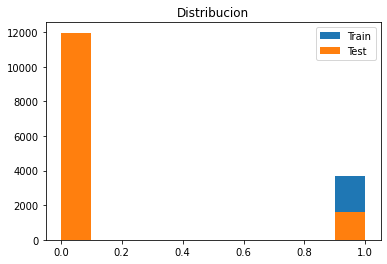

In [173]:
pl.hist(y3_res, label="Train")
pl.hist(y3_test, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

De acuerdo a los metodos en este proyecto utilizados, usamos los mejores hiperparametros

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   5469     6508
Verdadero  yes  520      1067


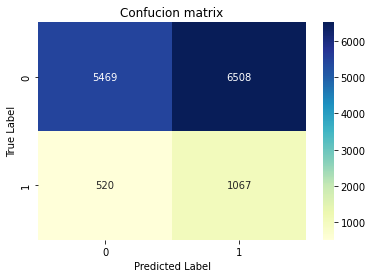

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.48186375700383366
Error en prueba: 0.5181362429961663
Sensibilidad: 0.6723377441713926


In [175]:
random_forest = RandomForestClassifier(n_estimators=257, max_features=.6)
random_forest.fit(X3_res, y3_res);
prediction_testRF = random_forest.predict(x3_test)
cnf_matrix = confusion_matrix(y3_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(random_forest.score(X3_res, y3_res)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X3_res, y3_res)))
print('SCORE prueba: {}'.format(random_forest.score(x3_test, y3_test)))
print('Error en prueba: {}'.format(1-random_forest.score(x3_test, y3_test)))
sensibilidad=recall_score(y3_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

Vemos una mejora muy representativa bajo este modelo con una **sensibilidad 65%y accuracy 48%**

 Implementamos grilla

In [181]:
from operator import truediv
grid = RandomizedSearchCV(
        estimator  = RandomForestClassifier(random_state=123),
        param_distributions = param_distributions,
        n_iter     = 30,
        scoring    = 'accuracy',
        n_jobs     =  -1,
        cv         = 5, 
        random_state = 123,
        return_train_score = True
       )

#grid.fit(X = X_train_res,  y = y_train_res)
grid.fit(X = X3_res,  y = y3_res)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_criterion,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
28,entropy,0.837053,759,0.580081,0.076007,1.000000,0.000000
23,gini,0.826341,517,0.578731,0.078908,1.000000,0.000000
13,entropy,0.987995,110,0.578597,0.069413,0.999966,0.000068
17,entropy,0.693403,184,0.578595,0.076271,1.000000,0.000000
26,entropy,0.869369,665,0.578055,0.077446,1.000000,0.000000
24,entropy,0.545068,749,0.577919,0.078538,1.000000,0.000000
10,entropy,0.724455,384,0.576975,0.076013,1.000000,0.000000
21,entropy,0.495492,699,0.576974,0.079395,1.000000,0.000000
2,entropy,0.491119,573,0.576299,0.078705,1.000000,0.000000
11,gini,0.722443,217,0.576030,0.075694,1.000000,0.000000


In [182]:
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.185917,0.124582,0.189101,0.009601,gini,0.712955,326,"{'criterion': 'gini', 'max_features': 0.712955...",0.467927,0.619176,...,0.575355,0.076185,12,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.457693,0.006637,0.016285,0.005525,gini,0.690885,21,"{'criterion': 'gini', 'max_features': 0.690884...",0.476705,0.619851,...,0.574275,0.070590,15,0.996454,0.99713,0.996961,0.996961,0.995949,0.996691,0.000435
2,13.938753,0.076798,0.343630,0.011240,entropy,0.491119,573,"{'criterion': 'entropy', 'max_features': 0.491...",0.468602,0.636057,...,0.576299,0.078705,9,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
3,1.876723,0.054982,0.075837,0.004364,gini,0.410924,117,"{'criterion': 'gini', 'max_features': 0.410924...",0.469953,0.634031,...,0.571977,0.077020,20,0.999831,1.00000,1.000000,1.000000,1.000000,0.999966,0.000068
4,5.893015,0.171365,0.423893,0.043668,gini,0.139951,548,"{'criterion': 'gini', 'max_features': 0.139950...",0.458474,0.613774,...,0.549149,0.077303,29,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
5,9.150468,0.472478,0.256800,0.016281,gini,0.627317,413,"{'criterion': 'gini', 'max_features': 0.627317...",0.467252,0.624578,...,0.575759,0.077792,11,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
6,6.363854,0.057117,0.265739,0.007127,entropy,0.244759,424,"{'criterion': 'entropy', 'max_features': 0.244...",0.457124,0.625253,...,0.559144,0.081448,28,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
7,8.620573,0.070570,0.270025,0.008522,gini,0.593902,455,"{'criterion': 'gini', 'max_features': 0.593902...",0.468602,0.626604,...,0.574543,0.077472,14,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
8,2.860790,0.048505,0.212555,0.007759,gini,0.083726,326,"{'criterion': 'gini', 'max_features': 0.083726...",0.455098,0.592167,...,0.538210,0.070881,30,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
9,2.866057,0.018305,0.111193,0.006758,gini,0.427863,180,"{'criterion': 'gini', 'max_features': 0.427863...",0.463876,0.636732,...,0.570491,0.078727,23,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000


In [186]:
modelo = grid.best_estimator_
modelo


RandomForestClassifier(criterion='entropy', max_features=0.8370527969666086,
                       n_estimators=759, random_state=123)

In [184]:
grid.best_score_


0.5800810263335585

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   5474     6503
Verdadero  yes  527      1060


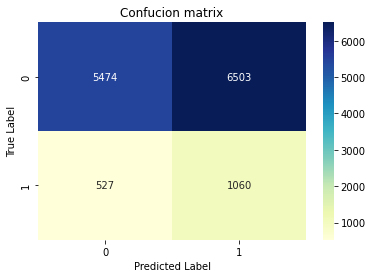

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.48171630787378356
Error en prueba: 0.5182836921262164
Sensibilidad: 0.6679269061121613


In [185]:
prediction_testRF = modelo.predict(x3_test)
cnf_matrix = confusion_matrix(y3_test, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(modelo.score(X3_res, y3_res)))
print('Error en entrenamiento: {}'.format(1-modelo.score(X3_res, y3_res)))
print('SCORE prueba: {}'.format(modelo.score(x3_test, y3_test)))
print('Error en prueba: {}'.format(1-modelo.score(x3_test, y3_test)))
sensibilidad=recall_score(y3_test,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))

# **Entrenamiento con todas las variables y mejores hiperparametros**

In [187]:
df_piv_no_classes.shape

(45211, 40)

In [188]:
y = df_piv[['y_yes']].values[:,0]
y.shape
x=df_piv_no_classes.values
x.shape

(45211, 40)

In [192]:
smote_tomek = SMOTETomek(random_state=12)
X_train_smt, y_train_smt = smote_tomek.fit_resample(x,y) 
print ("Distribucion Original {}".format(Counter(y)))
print ("Distribution despues smote-Tomek {}".format(Counter(y_train_smt)))

Distribucion Original Counter({0: 39922, 1: 5289})
Distribution despues smote-Tomek Counter({0: 38783, 1: 38783})


In [193]:
sc_x = StandardScaler()
sc_x.fit(X_train_smt)
X_scaler = sc_x.transform(X_train_smt)
print(np.mean(X_scaler)) 
print(np.std(X_scaler))

3.8491357548489907e-16
1.0000000000001643


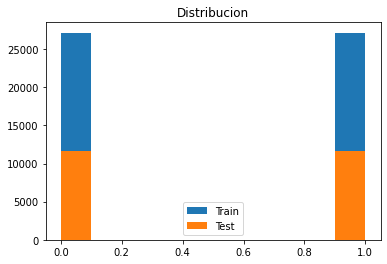

In [194]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_scaler, y_train_smt, test_size=0.3, random_state=123, stratify=y_train_smt)
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

                Valor    Predicho
---------  ---  -------  ----------
           -    no       yes
Valor      no   11284    351
Verdadero  yes  1057     10578


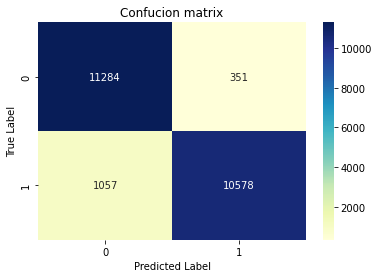

SCORE entrenamiento: 1.0
Error en entrenamiento: 0.0
SCORE prueba: 0.9394929093253116
Error en prueba: 0.0605070906746884
Sensibilidad: 0.9091534164159862
precision: 0.9678836124073565


In [197]:
random_forest = RandomForestClassifier(n_estimators=128, max_features=.4)
random_forest.fit(X_trainPF, y_trainPF);
prediction_testRF = random_forest.predict(X_testPF)
cnf_matrix = confusion_matrix(y_testPF, prediction_testRF)
list_cm(cnf_matrix,class_names)
sns.heatmap(cnf_matrix, cmap="YlGnBu",annot = True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confucion matrix")
plt.show()
print('SCORE entrenamiento: {}'.format(random_forest.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-random_forest.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(random_forest.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-random_forest.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testRF)
print("Sensibilidad: {}".format(sensibilidad))
precision=precision_score(y_testPF,prediction_testRF)
print("precision: {}".format(precision))

Encontramos el mejor modelo hasta el momento con una **precision del 96% sensibilidad 90% y accuracy 93%** motivo por el cual procedemos hacer la grafica ROC

In [198]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [199]:
auc = roc_auc_score(y_testPF,prediction_testRF)
text="ROC AUC=%.3f"% (auc)
print(text)
print('Red Neuronal: ROC AUC=%.3f' % (auc))

ROC AUC=0.939
Red Neuronal: ROC AUC=0.939


In [200]:
def plot_roc_curve(fper, tper,auc):
    plt.plot(fper, tper, color='red', label='ROC',)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.text(0.45, 0.8, auc, fontsize=9, color='red')
    plt.show()

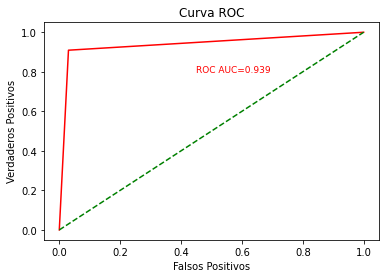

In [201]:
fper, tper, thresholds = roc_curve(y_testPF,prediction_testRF)
plot_roc_curve(fper, tper,text)

Realizamos cross validation para garantizar la efectividad del moddelo

**Cross Validation K-Folds**

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [204]:
kf = KFold(n_splits=3)
scores = cross_val_score(random_forest, X_trainPF, y_trainPF, cv=kf, scoring="accuracy",n_jobs=-1)
sensibilidades = cross_val_score(random_forest, X_trainPF, y_trainPF, cv=kf, scoring="recall",n_jobs=-1)

In [205]:
print("Metricas scores", scores)
print("Metricas sensibilidades", sensibilidades)

Metricas scores [0.93491353 0.93585281 0.93656758]
Metricas sensibilidades [0.89758903 0.89881151 0.90244974]


In [206]:
print("Media de cross_validation", scores.mean())

Media de cross_validation 0.9357779724031996
